In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams["font.size"] = 10
plt.style.use("bmh")

print(os.sys.version)

3.8.10 (v3.8.10:3d8993a744, May  3 2021, 09:09:08) 
[Clang 12.0.5 (clang-1205.0.22.9)]


In [56]:
PATH = "/Users/danieldiazalmeida/Downloads/DataScienceDatasets"
data = "aapl_raw_data.csv"

df = pd.read_csv(
    os.path.join(PATH, data)
)
print(df.shape)
df.info()

(10766, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10766 entries, 0 to 10765
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            10766 non-null  object 
 1   open            10766 non-null  float64
 2   high            10766 non-null  float64
 3   low             10766 non-null  float64
 4   close           10766 non-null  float64
 5   volume          10766 non-null  int64  
 6   adjusted_close  10766 non-null  float64
 7   change_percent  10765 non-null  float64
 8   avg_vol_20d     10747 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 757.1+ KB


In [57]:
df.head()

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
0,1980-12-12,28.7392,28.8736,28.7392,28.7392,2093900,0.0994,NaN,NaN
1,1980-12-15,27.3728,27.3728,27.2608,27.2608,785200,0.0943,-5.13,NaN
2,1980-12-16,25.3792,25.3792,25.2448,25.2448,472000,0.0873,-7.42,NaN
3,1980-12-17,25.8720,26.0064,25.8720,25.8720,385900,0.0895,2.52,NaN
4,1980-12-18,26.6336,26.7456,26.6336,26.6336,327900,0.0921,2.91,NaN


In [58]:
df.tail()

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
10761,2023-08-21,175.07,176.1300,173.7400,175.84,46311900,175.84,0.77,56106740.00
10762,2023-08-22,177.06,177.6800,176.2500,177.23,42084200,177.23,0.79,56346790.00
10763,2023-08-23,178.52,181.5500,178.3300,181.12,52722800,181.12,2.19,56609335.00
10764,2023-08-24,180.67,181.1000,176.0100,176.38,54945800,176.38,-2.62,56983615.00
10765,2023-08-25,177.38,179.1496,175.8201,178.61,45650607,178.61,1.26,56851575.35


In [59]:
date_index = pd.date_range(start=df["date"].iloc[0],
                           end=df["date"].iloc[-1],
                           freq='D'
                          )
df_ = pd.DataFrame(index=date_index)
df["date"] = pd.to_datetime(df.date)
df.index = df["date"]
df = df_.join(df)
df

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
1980-12-12,1980-12-12,28.7392,28.8736,28.7392,28.7392,2093900.0,0.0994,NaN,NaN
1980-12-13,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-14,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,1980-12-15,27.3728,27.3728,27.2608,27.2608,785200.0,0.0943,-5.13,NaN
1980-12-16,1980-12-16,25.3792,25.3792,25.2448,25.2448,472000.0,0.0873,-7.42,NaN
...,...,...,...,...,...,...,...,...,...
2023-08-21,2023-08-21,175.0700,176.1300,173.7400,175.8400,46311900.0,175.8400,0.77,56106740.00
2023-08-22,2023-08-22,177.0600,177.6800,176.2500,177.2300,42084200.0,177.2300,0.79,56346790.00
2023-08-23,2023-08-23,178.5200,181.5500,178.3300,181.1200,52722800.0,181.1200,2.19,56609335.00
2023-08-24,2023-08-24,180.6700,181.1000,176.0100,176.3800,54945800.0,176.3800,-2.62,56983615.00


In [61]:
df = df.drop('date', axis=1)
df.index.name = "date"
df.head()

,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
date,,,,,,,,
1980-12-12,28.7392,28.8736,28.7392,28.7392,2093900.0,0.0994,NaN,NaN
1980-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,27.3728,27.3728,27.2608,27.2608,785200.0,0.0943,-5.13,NaN
1980-12-16,25.3792,25.3792,25.2448,25.2448,472000.0,0.0873,-7.42,NaN


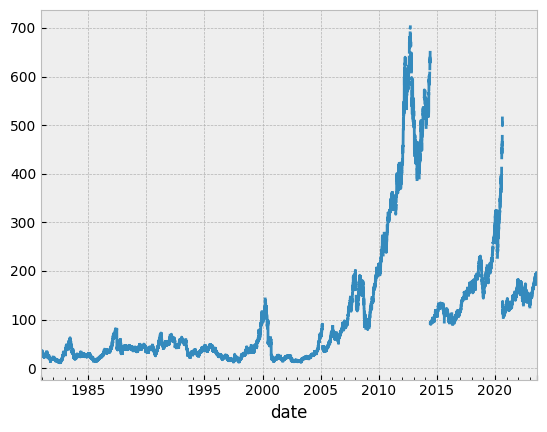

In [78]:
df["open"].plot()
plt.show()

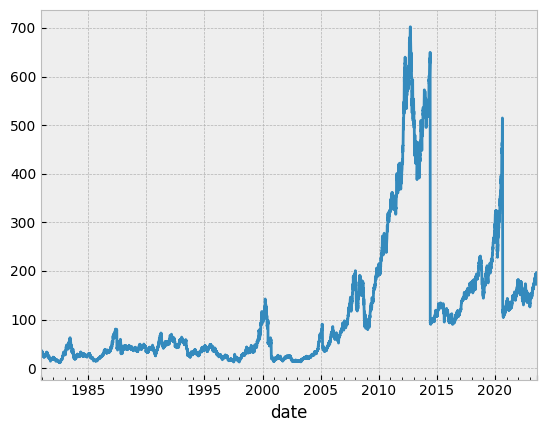

In [71]:
df["open"].interpolate(method='linear').plot()
plt.show()

In [92]:
df = df.interpolate(method='index')

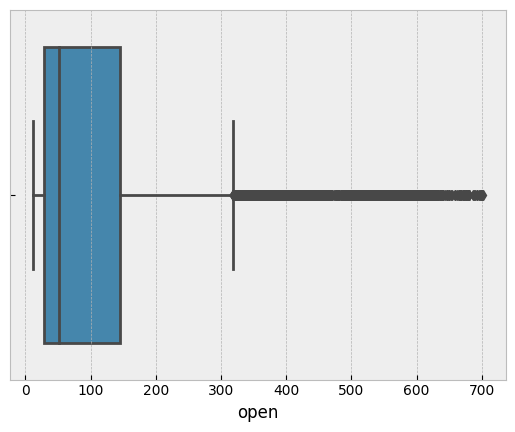

In [93]:
sns.boxplot(data=df, x="open")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


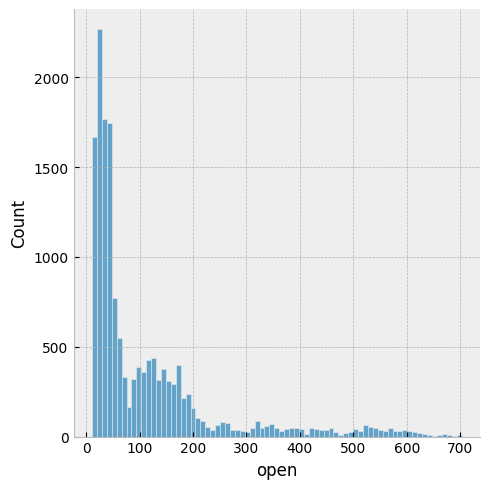

In [94]:
sns.displot(df, x="open", kind='hist')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


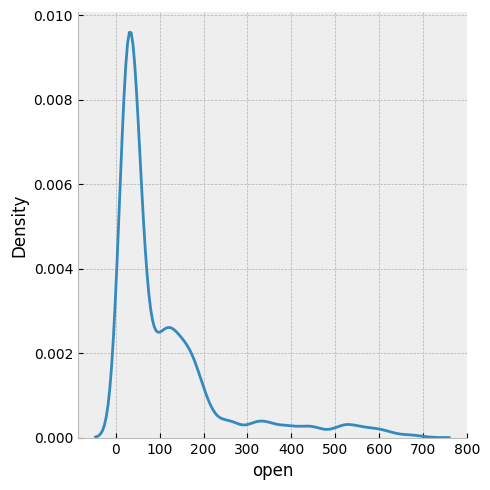

In [95]:
sns.displot(df, x="open", kind='kde')
plt.show()

In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,15597.0,1.123800e+02,1.317827e+02,1.113280e+01,2.932907e+01,5.202960e+01,1.449504e+02,7.024108e+02
high,15597.0,1.137419e+02,1.329579e+02,1.113280e+01,2.988160e+01,5.322053e+01,1.467000e+02,7.050708e+02
low,15597.0,1.109758e+02,1.305178e+02,1.099840e+01,2.873920e+01,5.111680e+01,1.435500e+02,6.995688e+02
close,15597.0,1.123971e+02,1.318031e+02,1.099840e+01,2.925440e+01,5.208000e+01,1.454000e+02,7.021000e+02
volume,15597.0,1.846216e+07,2.702798e+07,0.000000e+00,1.398333e+06,5.755900e+06,2.588170e+07,3.326072e+08
adjusted_close,15597.0,1.803637e+01,3.909394e+01,3.810000e-02,2.406000e-01,4.143000e-01,1.590013e+01,1.961851e+02
change_percent,15594.0,9.704854e-02,2.634213e+00,-5.187000e+01,-1.180000e+00,2.666667e-02,1.350000e+00,3.329000e+01
avg_vol_20d,15566.0,3.237579e+08,2.716888e+08,1.489264e+07,1.410247e+08,2.277780e+08,4.217014e+08,1.879186e+09


In [339]:
df.isnull().sum()

open               0
high               0
low                0
close              0
volume             0
adjusted_close     0
change_percent     3
avg_vol_20d       31
dtype: int64

# Time Series Analysis

In [99]:
from statsmodels.tsa.api import acf, graphics, pacf
import statsmodels.api as sm

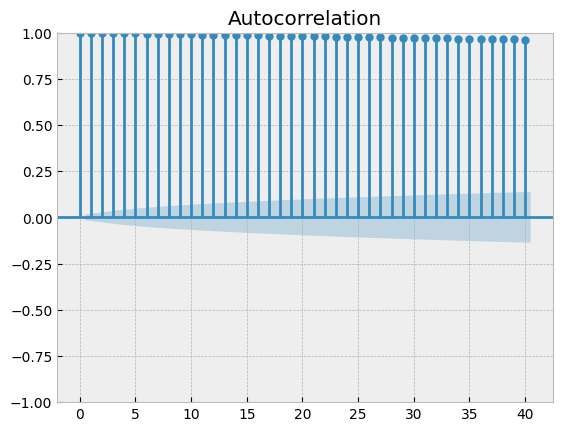

In [340]:
sm.graphics.tsa.plot_acf(df.open, lags=40)
plt.show()

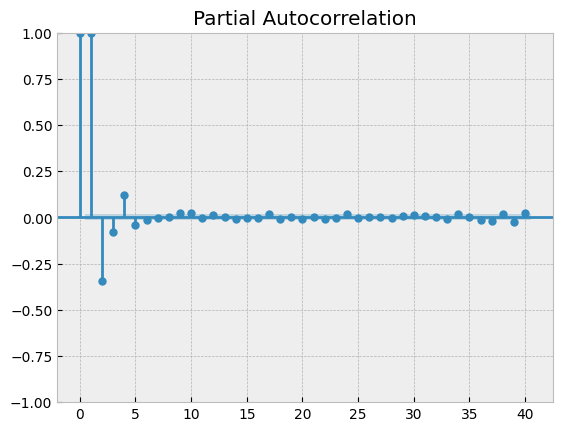

In [101]:
sm.graphics.tsa.plot_pacf(df.open, lags=40, method="ywm")
plt.show()

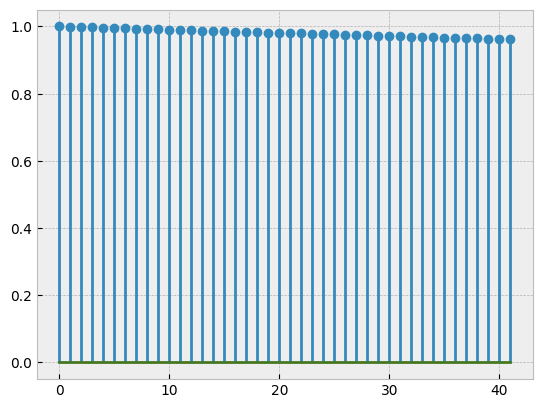

In [341]:
plt.stem(acf(df.open))
plt.show()

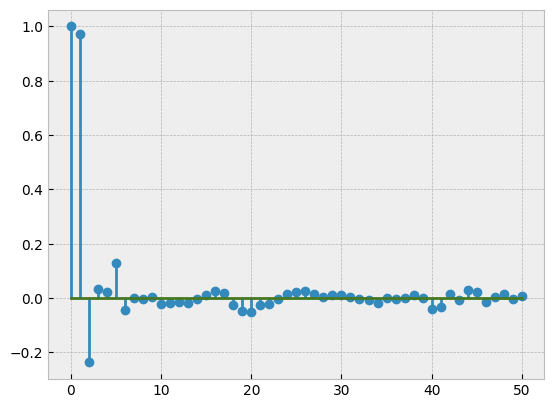

In [342]:
plt.stem(pacf(ds))
plt.show()

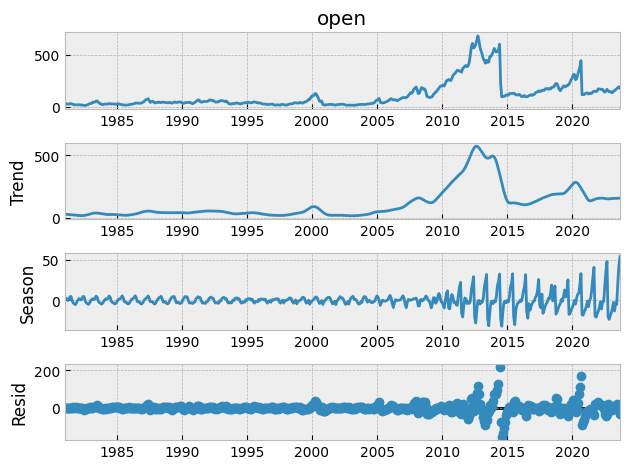

In [112]:
from statsmodels.tsa.seasonal import STL

stl = STL(df['open'].resample('M').mean(), seasonal=13)
res = stl.fit()
fig = res.plot()

In [118]:
train_idx = int(.8 * df.shape[0])
train_data = df["open"].iloc[:train_idx]

In [119]:
test_data = df["open"].iloc[train_idx:]

In [250]:
def normalizer(data):
    mean = data.mean()
    std = data.std()

    return (data - mean) / std, mean, std

In [252]:
# normalized train data
train_data_n, train_mean, train_std = normalizer(train_data)

In [254]:
test_data_n = (test_data - train_mean) / train_std

In [123]:
def get_seq(data, seq_length=1):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:(i+seq_length)])
        y.append(data[(i+seq_length)])

    return np.array(x), np.array(y)

In [255]:
X_train, y_train = get_seq(data=train_data_n)

In [256]:
x_test, y_test = get_seq(data=test_data_n)

In [343]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import TensorDataset, DataLoader

from torchmetrics import MeanSquaredError
print(torch.__version__)

2.0.1


In [357]:
train_set = TensorDataset(
    pad_sequence([torch.tensor(X_train, dtype=torch.float32)]),
    torch.tensor(y_train, dtype=torch.float32)
)

test_set = TensorDataset(
    pad_sequence([torch.tensor(x_test, dtype=torch.float32)]),
    torch.tensor(y_test, dtype=torch.float32)
)

g = torch.Generator().manual_seed(42)
train_loader = DataLoader(train_set,
                          batch_size=32, 
                          shuffle=True, generator=g)

test_loader = DataLoader(test_set,
                          batch_size=32, 
                          shuffle=False)

In [358]:
# model
class MyRModel(nn.Module):
    def __init__(self):
        super(MyRModel, self).__init__()
        self.hidden_size = 32

        self.lstm = nn.LSTM(
            input_size=1,
            hidden_size=self.hidden_size,
            num_layers=1,
            batch_first=True
        )

        self.fcl = nn.Linear(in_features=self.hidden_size,
                             out_features=1
                            )

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        c0 = torch.zeros(1, x.size(0), self.hidden_size)

        x, _ = self.lstm(x, (h0, c0))
        out = self.fcl(x[:, -1, :])
        return out

In [318]:
# model
class MyGRUModel(nn.Module):
    def __init__(self):
        super(MyGRUModel, self).__init__()
        self.hidden_size = 16

        self.gru = nn.GRU(
            input_size=1,
            hidden_size=self.hidden_size,
            num_layers=1,
            batch_first=True
        )

        self.fcl = nn.Linear(in_features=self.hidden_size,
                             out_features=1
                            )

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size)

        x, _ = self.gru(x, h0)
        out = self.fcl(x[:, -1, :])
        return out

In [359]:
model = MyRModel()

In [369]:
model = MyGRUModel()

In [370]:
criterion = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=.9)

In [371]:
EPOCHS = 151

for epoch in range(EPOCHS):
    model.train()
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.view(-1, 1, 1)
        yhat = model(x_batch).squeeze()
        loss = criterion(yhat, y_batch)

        optim.zero_grad()
        loss.backward()
        optim.step()

    if epoch%10==0:
        print(f"Epoch: {epoch}"
              f"\nLoss: {loss.item()}"
             )

Epoch: 0
Loss: 0.010246600024402142
Epoch: 10
Loss: 0.000766306126024574
Epoch: 20
Loss: 0.002116131130605936
Epoch: 30
Loss: 0.0035151708871126175
Epoch: 40
Loss: 0.0005621664458885789
Epoch: 50
Loss: 0.00043865854968316853
Epoch: 60
Loss: 0.002297414233908057
Epoch: 70
Loss: 0.0005702002090401947
Epoch: 80
Loss: 0.0004970604204572737
Epoch: 90
Loss: 0.0027057600673288107
Epoch: 100
Loss: 0.000745763536542654
Epoch: 110
Loss: 0.0003443199093453586
Epoch: 120
Loss: 0.00044220592826604843
Epoch: 130
Loss: 0.001329694059677422
Epoch: 140
Loss: 0.0005556407268159091
Epoch: 150
Loss: 0.0005089348996989429


In [372]:
# Define MSE metric
mse = MeanSquaredError()

model.eval()
with torch.no_grad():
    for seqs, labels in test_loader:
        seqs = seqs.view(-1, 1, 1)
        # Pass seqs to net and squeeze the result
        outputs = model(seqs).squeeze()
        mse(outputs, labels)

# Compute final metric value
test_mse = mse.compute()
print(f"Test MSE: {test_mse}")

Test MSE: 0.001707854331471026


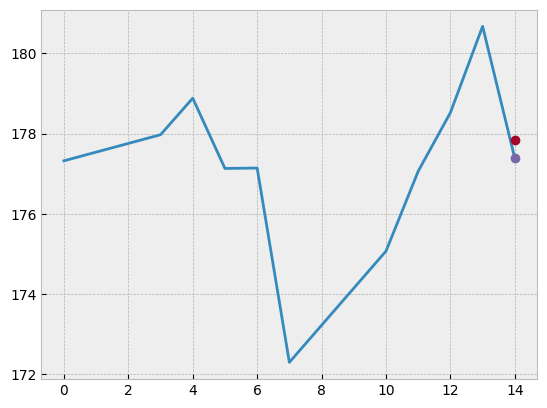

In [373]:
plt.plot(labels.detach().numpy()*train_std + train_mean)
plt.plot(range(len(labels))[-1], outputs.detach().numpy()[-1]*train_std + train_mean, marker='o')
plt.plot(range(len(labels))[-1], df["open"].iloc[-1], marker='o')

In [379]:
for p in model.parameters():
    print(p.numel(), p.name)

48 None
768 None
48 None
48 None
16 None
1 None
